In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
# import seaborn as sns
import random

In [4]:
## get a path to the folder with images
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Mun/Spring2020/Course_Study/9804 (ImageProcessingandApplications)/Project/Code/data')

In [47]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

In [48]:
## get a path to the folder with images
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Mun/Spring2020/Course_Study/9804 (ImageProcessingandApplications)/Project/Code/MachineVision/data')

In [49]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16)

In [78]:
data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Mun\Spring2020\Course_Study\9804 (ImageProcessingandApplications)\Project\Code\MachineVision\data;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Mun\Spring2020\Course_Study\9804 (ImageProcessingandApplications)\Project\Code\MachineVision\data;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: C:\Mun\Spring2020\Course_Study\9804 (ImageProcessingandApplications)\Project\Code\MachineVision\data

In [51]:
print(data.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


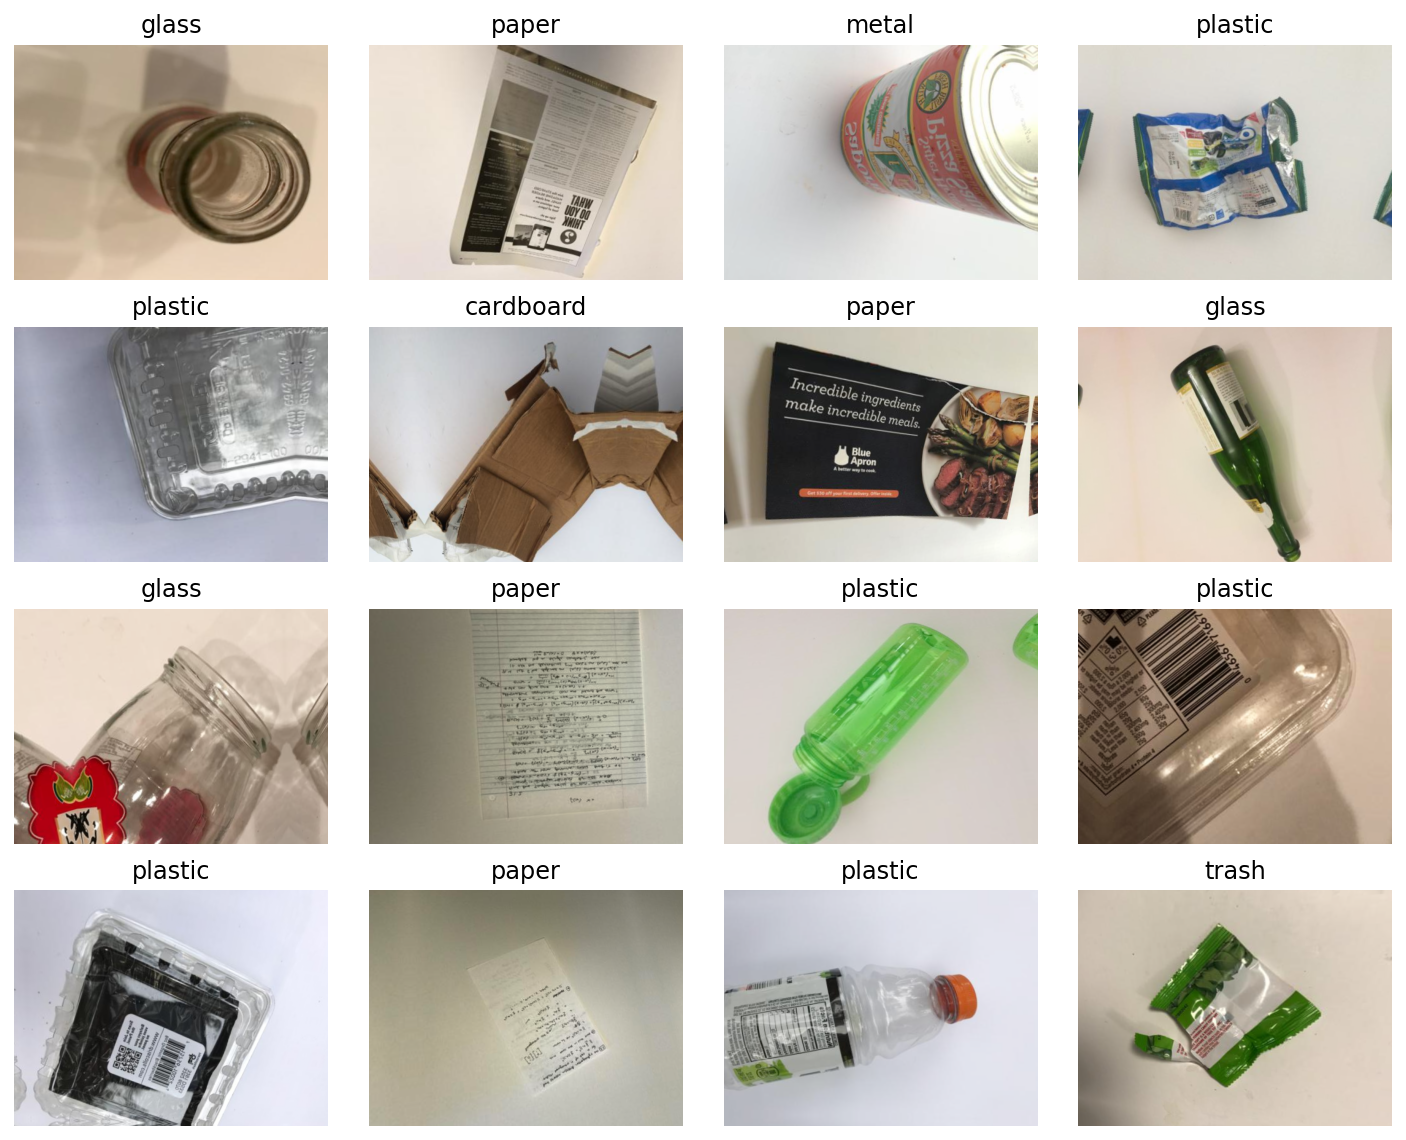

In [52]:
data.show_batch(rows=4,figsize=(10,8))

In [53]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

C:\Users\kaush\anaconda3\lib\site-packages\fastai\vision\learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [54]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [55]:
# learn.lr_find(start_lr=1e-6,end_lr=1e1)
# learn.recorder.plot()

In [56]:
learn.fit_one_cycle(5,max_lr=5.13e-03)

In [57]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

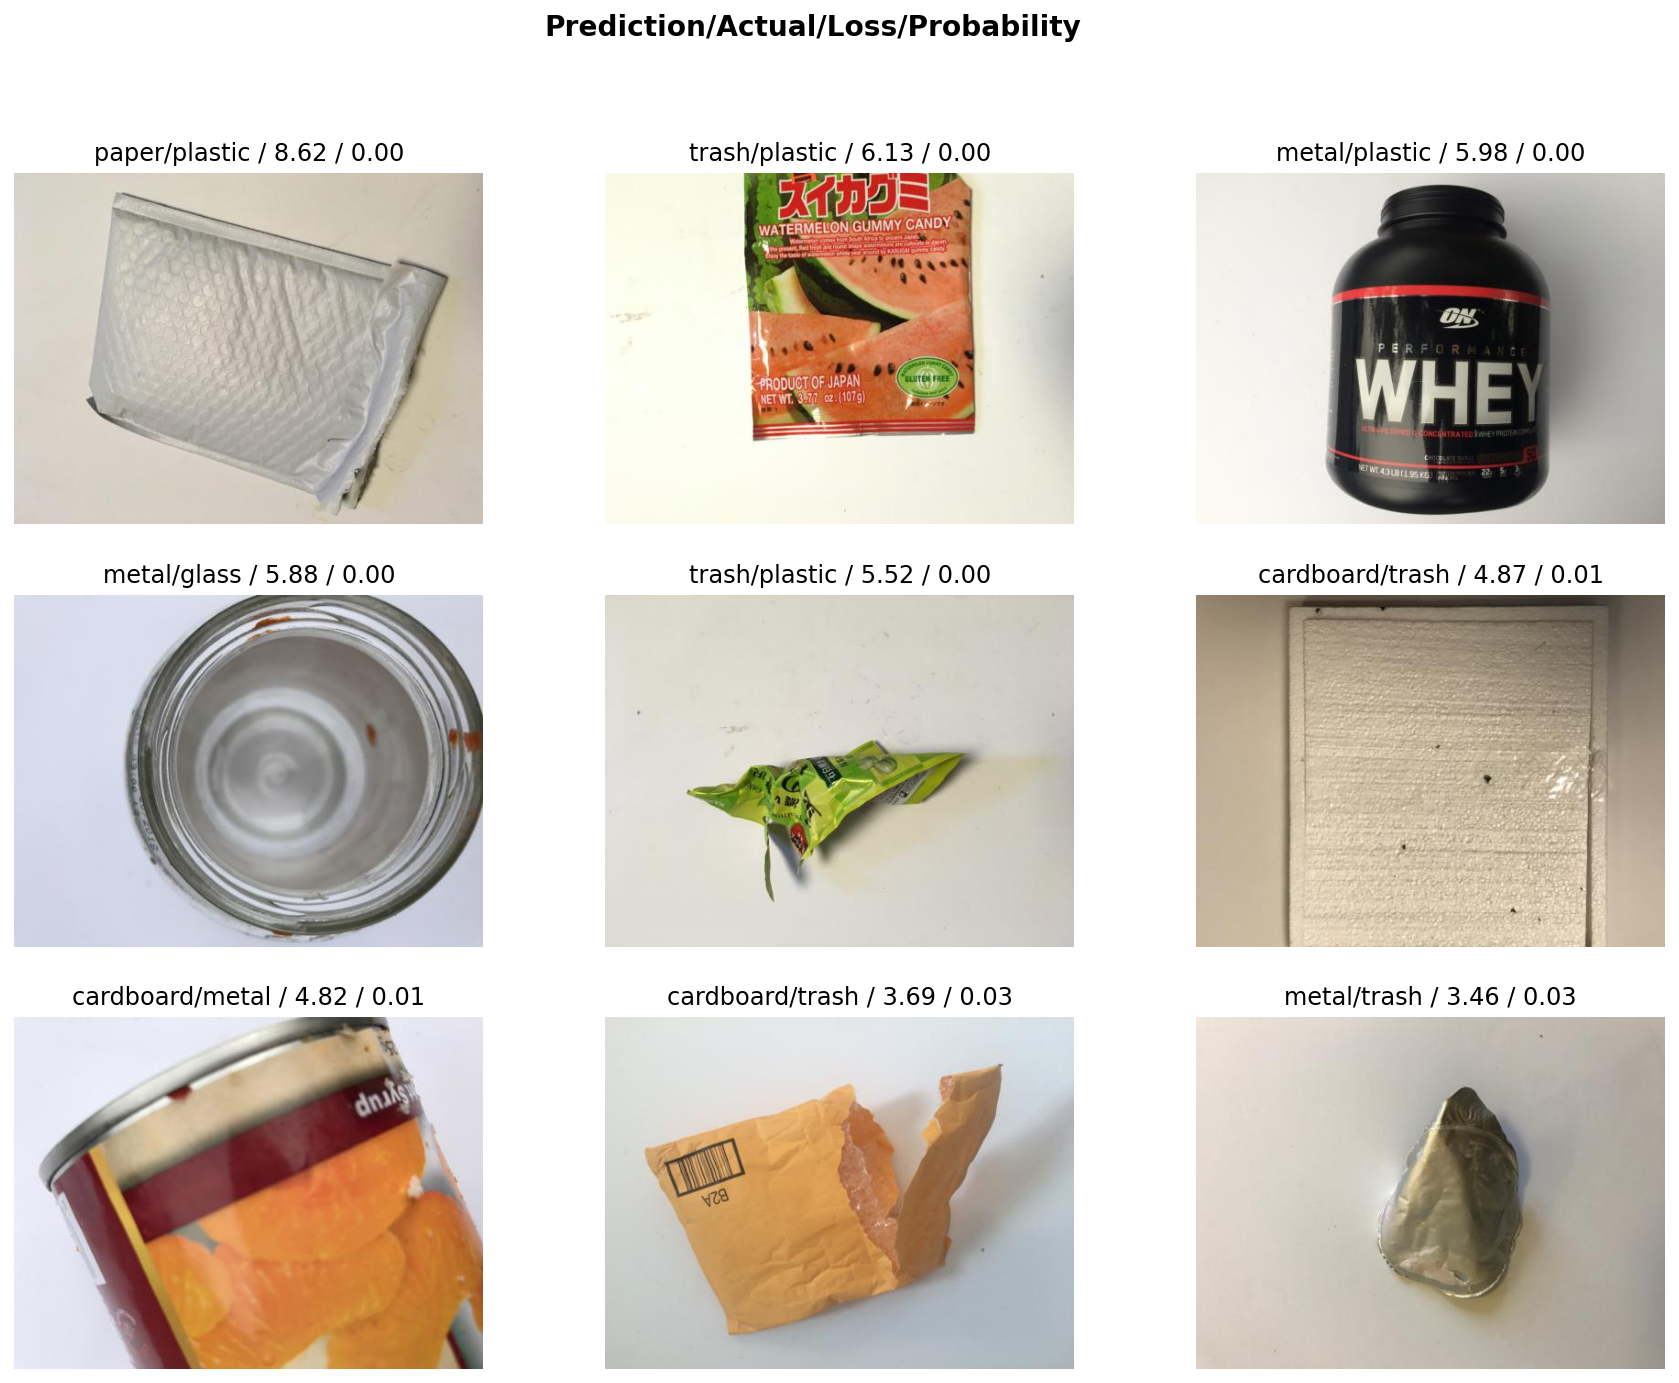

In [58]:
interp.plot_top_losses(9, figsize=(15,11))

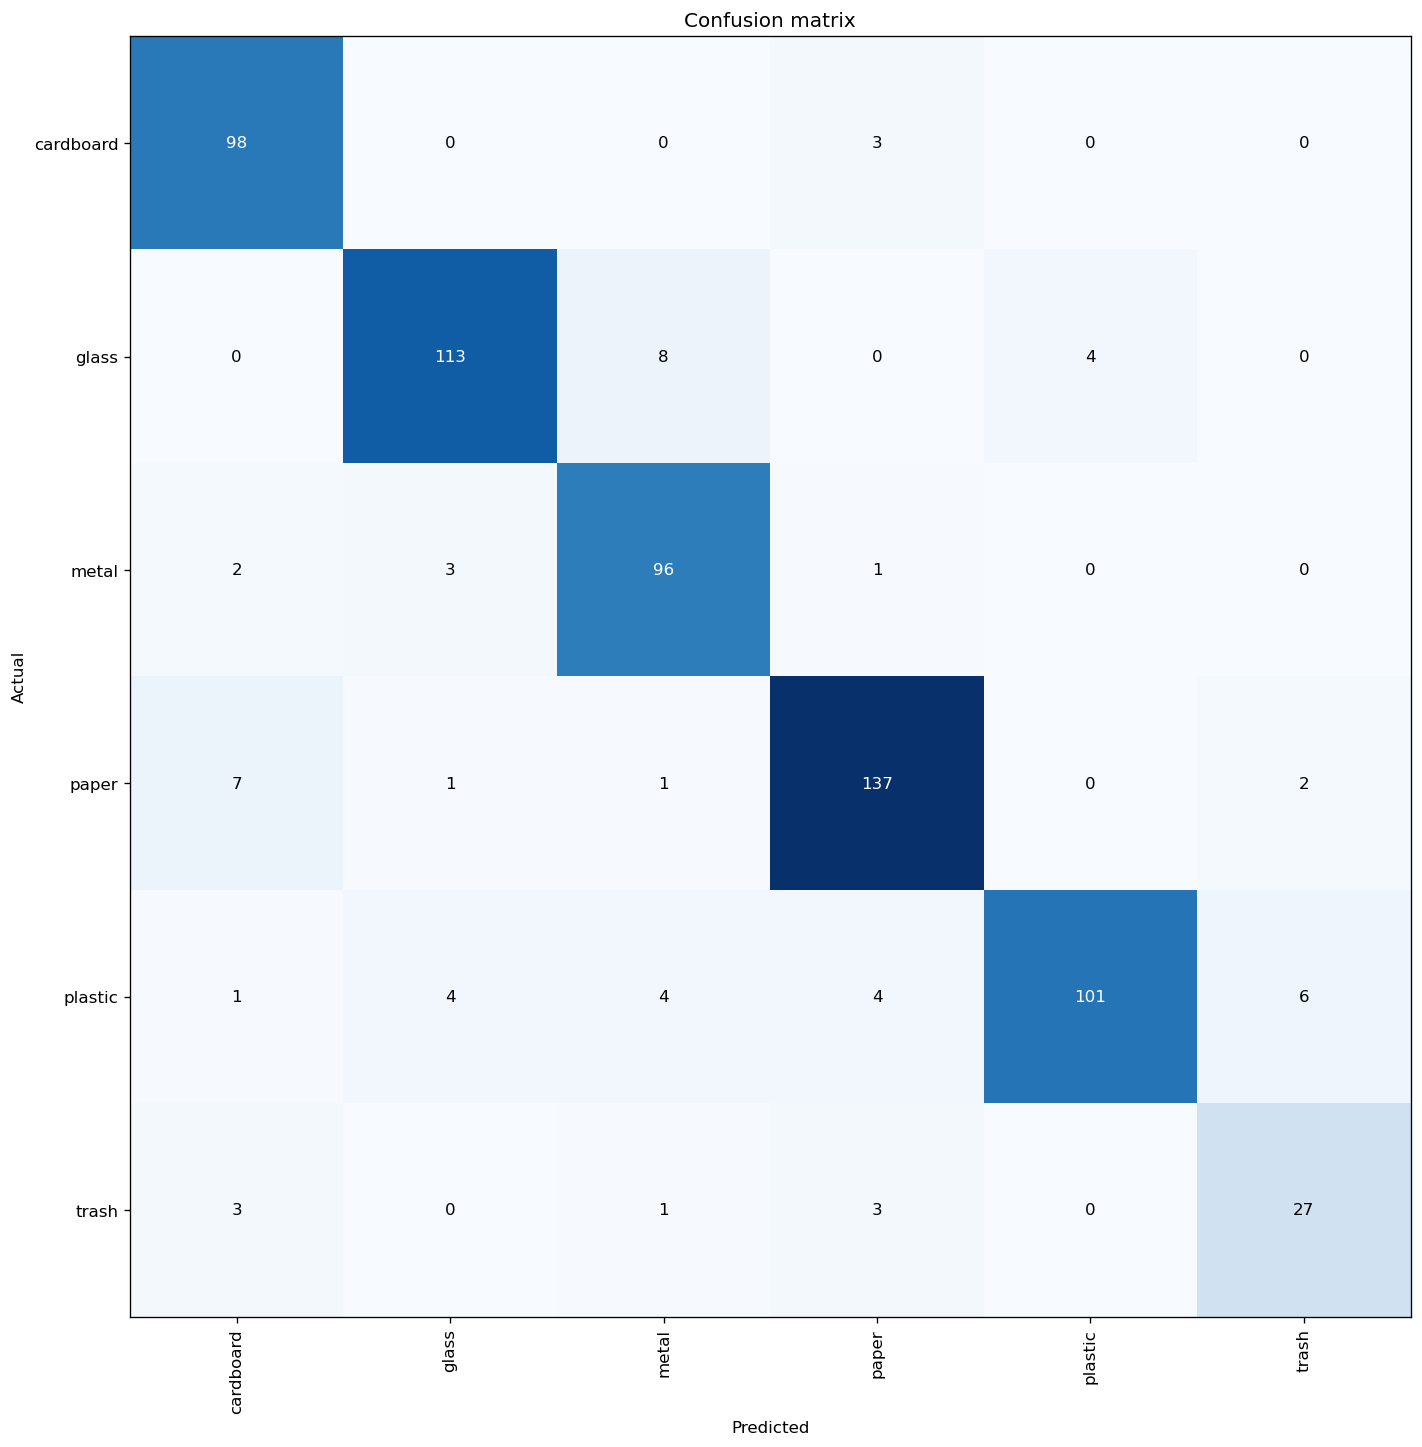

In [59]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
interp.most_confused(min_val=2)

[('glass', 'metal', 8),
 ('paper', 'cardboard', 7),
 ('plastic', 'trash', 6),
 ('glass', 'plastic', 4),
 ('plastic', 'glass', 4),
 ('plastic', 'metal', 4),
 ('plastic', 'paper', 4),
 ('cardboard', 'paper', 3),
 ('metal', 'glass', 3),
 ('trash', 'cardboard', 3),
 ('trash', 'paper', 3),
 ('metal', 'cardboard', 2),
 ('paper', 'trash', 2)]

In [61]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [62]:
print(preds[0].shape)
preds[0]

torch.Size([635, 6])


tensor([[9.6733e-01, 3.2493e-05, 1.6717e-04, 2.9625e-02, 1.7569e-03, 1.0929e-03],
        [9.8595e-01, 1.8171e-05, 1.9464e-04, 9.8550e-03, 1.3109e-04, 3.8549e-03],
        [9.9999e-01, 7.3939e-09, 2.0143e-07, 3.2567e-06, 8.2002e-07, 5.9374e-06],
        ...,
        [2.3084e-02, 3.0063e-04, 6.3663e-05, 9.2249e-01, 2.5610e-03, 5.1498e-02],
        [1.9556e-03, 3.0310e-06, 1.0342e-05, 8.1525e-01, 1.0686e-05, 1.8277e-01],
        [8.4114e-01, 7.8256e-04, 1.8665e-03, 1.3125e-01, 1.4158e-04, 2.4815e-02]])

In [63]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [64]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [65]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

In [66]:
yhat

['cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'glass',
 'cardboard',
 'cardboard',
 'cardboard',
 'paper',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'trash',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'paper',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardbo

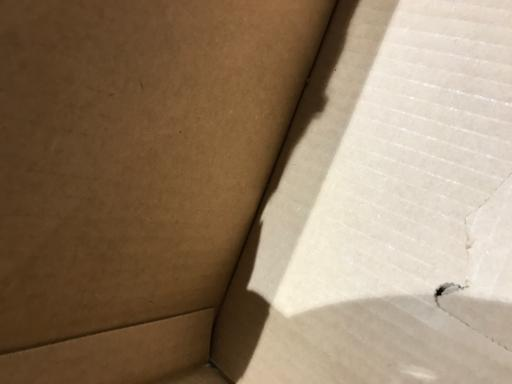

In [67]:
learn.data.test_ds[0][0]

In [85]:
def image_type(filename):
    
    if "cardboard" in filename:
        return 'cardboard'
    elif "glass" in filename:
        return 'glass'
    elif "metal" in filename:
        return 'metal'
    elif "paper" in filename:
        return 'paper'
    elif "plastic" in filename:
        return 'plastic'
    elif "trash" in filename:
        return 'trash'
    
    
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:    
    y.append(str(label_path))
#     print(label_path)
    
## then extract waste type from file path
# pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
#     pattern.search(y[i])
#     y[i] = pattern.search(y[i]).group(1)
    true_type = image_type(y[i])
    y[i] = true_type

In [86]:
y

['cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'card

In [89]:
## predicted values
print(yhat[0:15])
## actual values
print(y[0:15])

['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'glass', 'cardboard', 'cardboard', 'cardboard', 'paper', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard']
['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard']


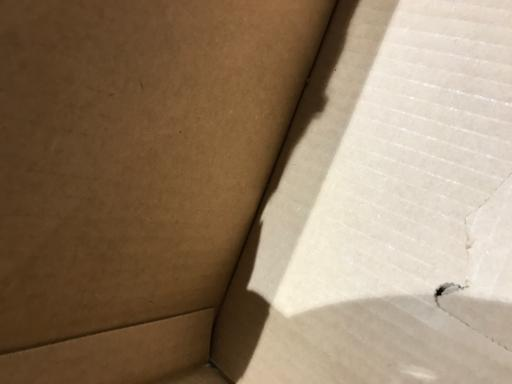

In [71]:
learn.data.test_ds[0][0]

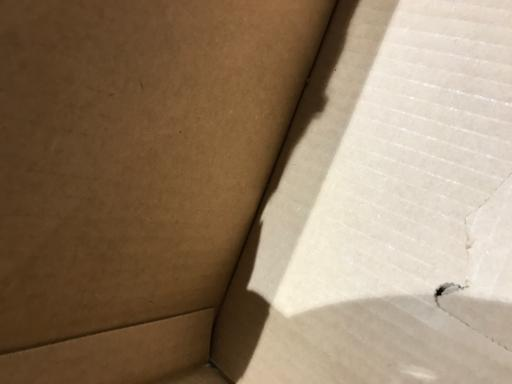

In [72]:
learn.data.test_ds[0][0]

In [73]:
cm = confusion_matrix(y,yhat)
print(cm)

[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [104 117 106 151 121   0  36]
 [  0   0   0   0   0   0   0]]


In [74]:
df_cm = pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

ValueError: Shape of passed values is (7, 7), indices imply (6, 6)

In [ ]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [ ]:
accuracy = correct/sum(sum(cm))
accuracy

In [ ]:
## delete everything when you're done to save space
shutil.rmtree("data")
shutil.rmtree('dataset-resized')